# 딥러닝 실습 - Boston Housing Dataset

1.   데이터 불러오기
2.   데이터 탐색 및 전처리
3.   모델 구성
4.   모델 훈련
5.   모델 검증

---


In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

##1. 데이터 불러오기

In [2]:
from tensorflow.keras.datasets import boston_housing
# https://keras.io/api/datasets/boston_housing/#boston-housing-price-regression-dataset
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
label_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

'''
Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's
 '''
pass

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


##2. 데이터 탐색 및 전처리

In [3]:
print('x_train :', x_train.shape, '\ty_train :', y_train.shape)
print('x_test :', x_test.shape, '\ty_test :', y_test.shape)

x_train : (404, 13) 	y_train : (404,)
x_test : (102, 13) 	y_test : (102,)


In [4]:
# 데이터 확인
df = pd.DataFrame(x_train, columns=label_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [5]:
# 결측치 확인
df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [6]:
# 통계치 확인
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


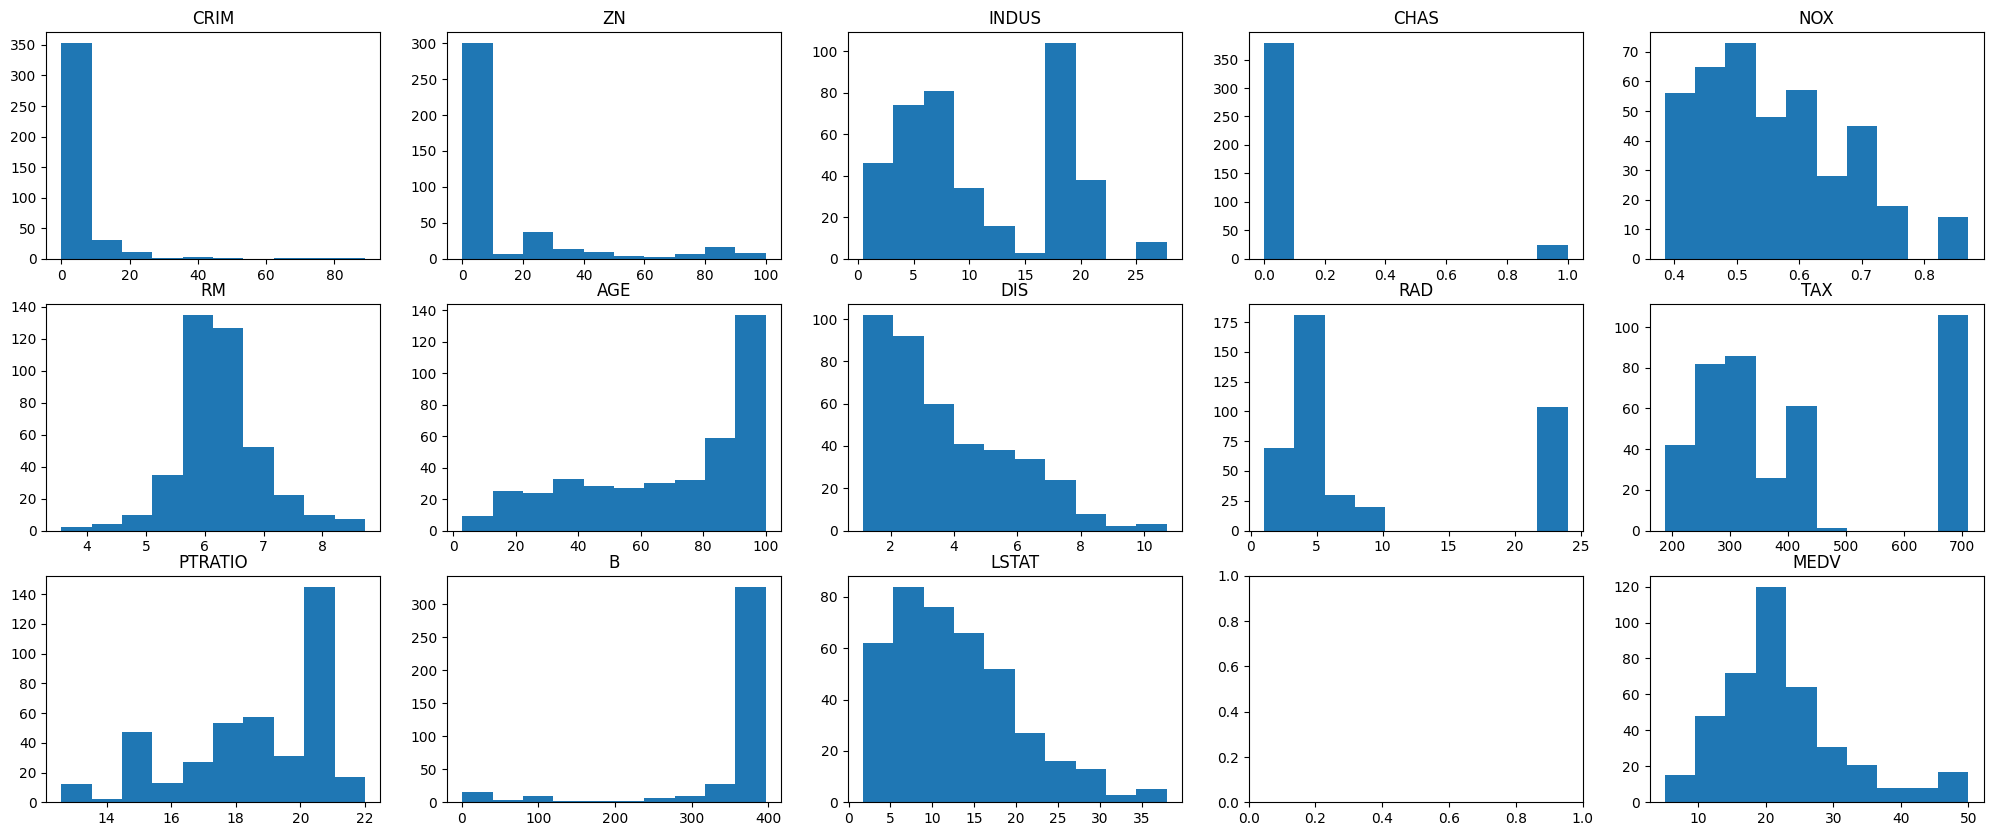

In [7]:
# 데이터 시각화
f, ax = plt.subplots(3, 5, figsize=(25,10))
for i in range(0,x_train.shape[1]):
  ax[i//5][i%5].hist(x_train[:,i])
  ax[i//5][i%5].set_title(label_names[i])
ax[2,4].hist(y_train)
ax[2,4].set_title("MEDV")
plt.show()

In [8]:
# 데이터 표준화
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)
x_train = (x_train - mean)/std
x_test = (x_test - mean)/std

pd.DataFrame(x_train, columns=label_names).describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,404.000000,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02
mean,-1.055261e-16,-1.319077e-17,1.789548e-15,-3.077846e-17,-5.219147e-15,6.404118e-15,2.682123e-16,5.452184e-16,0.000000,-1.802738e-16,2.366864e-14,6.045769e-15,6.199661e-16
std,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00
min,-4.051005e-01,-4.836155e-01,-1.564696e+00,-2.568327e-01,-1.471269e+00,-3.817250e+00,-2.369042e+00,-1.287503e+00,-0.971569,-1.311311e+00,-2.673752e+00,-3.771101e+00,-1.519664e+00
25%,-3.969615e-01,-4.836155e-01,-8.782218e-01,-2.568327e-01,-8.908055e-01,-5.534305e-01,-8.433882e-01,-8.202251e-01,-0.626249,-7.636737e-01,-5.692381e-01,2.116008e-01,-8.075036e-01
50%,-3.766520e-01,-4.836155e-01,-2.079167e-01,-2.568327e-01,-1.652266e-01,-9.674263e-02,3.400464e-01,-2.949009e-01,-0.511142,-4.567563e-01,2.839433e-01,3.879673e-01,-1.857436e-01
75%,-7.617386e-03,4.296024e-02,1.028326e+00,-2.568327e-01,6.286420e-01,4.823165e-01,8.990647e-01,6.794540e-01,1.675886,1.565287e+00,7.844764e-01,4.401777e-01,6.005999e-01
max,9.234847e+00,3.728990e+00,2.445374e+00,3.893584e+00,2.677335e+00,3.467186e+00,1.110488e+00,3.437406e+00,1.675886,1.836097e+00,1.603531e+00,4.480771e-01,3.482019e+00


In [9]:
# 훈련셋/검증셋 분리
xy_train = np.column_stack((x_train,y_train))
np.random.shuffle(xy_train)

xy_val = xy_train[:int(xy_train.shape[0]/5)]
xy_train = xy_train[int(xy_train.shape[0]/5):]

print('xy_val :', xy_val.shape, '\t\t\txy_train :', xy_train.shape)

x_val = xy_val[:,:13]
y_val = xy_val[:,13]
x_train = xy_train[:,:13]
y_train = xy_train[:,13]

print('x_val :', x_val.shape, '\ty_val :', y_val.shape, '\tx_train :', x_train.shape, '\ty_train :', y_train.shape)

xy_val : (80, 14) 			xy_train : (324, 14)
x_val : (80, 13) 	y_val : (80,) 	x_train : (324, 13) 	y_train : (324,)


##3. 모델 구성

In [10]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=[x_train.shape[1]]))
model.add(Dense(48, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 48)                  │           3,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 12)                  │             588 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              13 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,617 (18.04 KB)

 Trainable params: 4,617 (18.04 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# example test
model.predict(x_train[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 667ms/step


array([[0.34450108],
       [1.3354573 ],
       [0.38347694],
       [0.2956863 ],
       [0.299044  ],
       [1.7896419 ],
       [0.18948361],
       [0.21198517],
       [0.3592013 ],
       [0.5135969 ]], dtype=float32)

##4. 모델 훈련

In [13]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0005), loss='mse', metrics=['mae'])
history = model.fit(x_train, y_train, validation_data=(x_val,y_val),epochs=50, batch_size=10)

Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 524.5760 - mae: 21.0137 - val_loss: 539.2672 - val_mae: 20.8823
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 335.3230 - mae: 16.6137 - val_loss: 373.8344 - val_mae: 16.6485
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 259.1241 - mae: 13.4083 - val_loss: 205.4113 - val_mae: 11.0920
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 131.7456 - mae: 8.6291 - val_loss: 102.3390 - val_mae: 7.1520
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 60.6607 - mae: 5.7607 - val_loss: 68.7224 - val_mae: 6.0246
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 59.8113 - mae: 5.5454 - val_loss: 52.6225 - val_mae: 5.1799
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 36.2227 - mae: 4.3277 - val_loss: 37.9824 - val_mae: 4.4858
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29.2680 - mae: 4.0165 - val_loss: 29.5629 - val_mae: 3.8837
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [14]:
pd.DataFrame(history.history).head(15)

,loss,mae,val_loss,val_mae
0,476.911987,19.969418,539.267212,20.882338
1,353.704926,16.663767,373.834412,16.648483
2,215.607712,12.128075,205.411331,11.091971
3,111.639313,7.817341,102.338974,7.151956
4,70.989136,6.085875,68.722351,6.024602
5,54.378510,5.289796,52.622528,5.179932
6,43.303120,4.630653,37.982388,4.485762
7,34.922562,4.155093,29.562939,3.883656
8,29.295223,3.790307,23.714588,3.505939
9,25.478558,3.520834,22.617863,3.339813


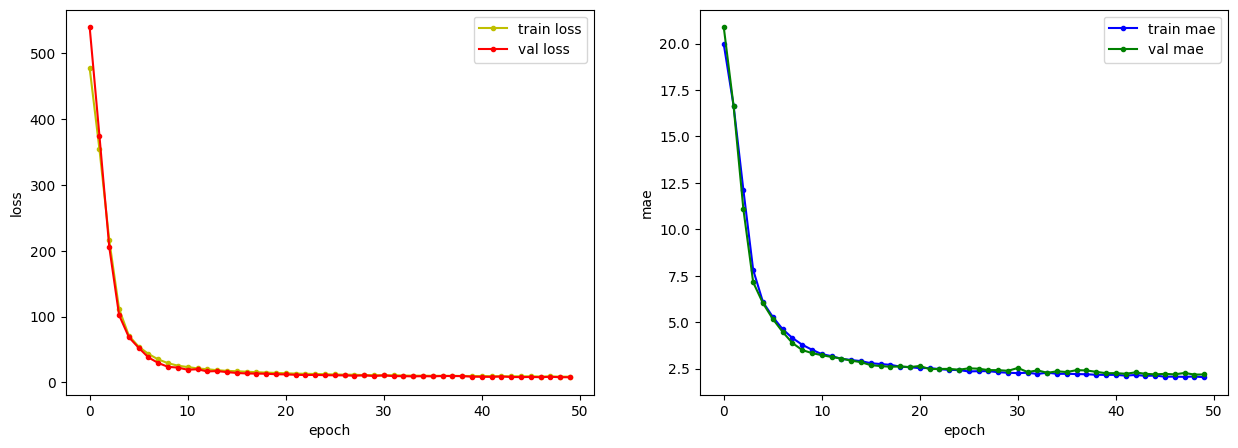

In [15]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(history.history['loss'], 'y.-', label='train loss')
ax[0].plot(history.history['val_loss'], 'r.-', label='val loss')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('loss')
ax[0].legend(loc='upper right')

ax[1].plot(history.history['mae'], 'b.-', label='train mae')
ax[1].plot(history.history['val_mae'], 'g.-', label='val mae')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('mae')
ax[1].legend(loc='upper right')

plt.show()

##5. 모델 검증

In [16]:
# test data를 이용한 검증
y_eval = model.evaluate(x_test, y_test)
print(y_eval)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - loss: 18.0191 - mae: 2.9637
[23.224016189575195, 3.1261446475982666]


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
(102,)


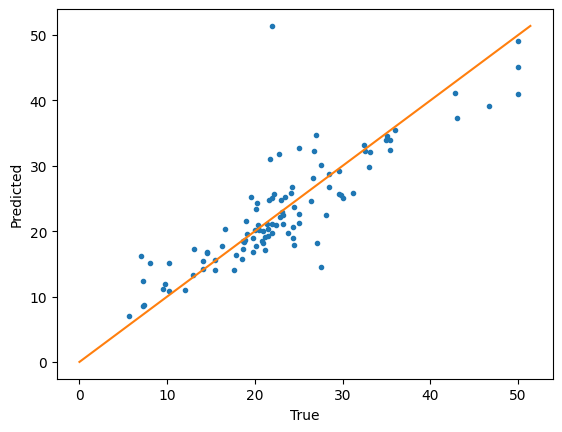

In [17]:
# 예측값과 실제값 비교
y_pred = model.predict(x_test)[:,0]
print(y_pred.shape)

plt.plot(y_test, y_pred, '.')
plt.plot([0,y_pred.max()],[0,y_pred.max()])
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

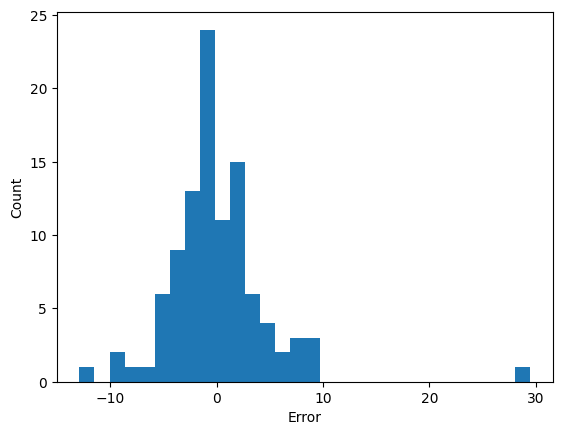

In [18]:
# 오차 히스토그램
plt.hist(y_pred-y_test, bins=30)
plt.xlabel('Error')
plt.ylabel('Count')
plt.show()

In [19]:
# 성능 평가 지표
mse = (np.sum(np.square(y_pred-y_test)))/y_pred.shape[0]
print('MSE\t:',mse)
print('RMSE\t:',np.sqrt(mse))
msle = (np.sum(np.square(np.log(y_pred+1)-np.log(y_test+1))))/y_pred.shape[0]
print('MSLE\t:',msle)
print('RMSLE\t:',np.sqrt(msle))

MSE	: 23.224017436851472
RMSE	: 4.819130361055973
MSLE	: 0.04062098855618296
RMSLE	: 0.20154649229441568
